# Lecture 9: Basic statistical tests with R
R provides a number of functions for statistical tests.

#### In this lecture, we will learn how to perform simple statistical tests, including
- Tests of means
- Tests of variances
- Tests of proportions
- Tests of correlations

I am only going to cover the most classic statistical tests. Statisticians today prefer modeling.

<h4 style="color:Red;">We should not use these tests/functions as black boxes!!!</h4>

- <b>The R tutorial should have ended.</b>
    - I believe that I have taught all basic operations in R.
    - And how to explore new functions and new packages.


- <b>The material starting today's lecture is more theoretical. Please keep in mind that,</b>
    - No test is magical - they all rely on assumptions and have limitations.
    - I do <b>NOT</b> recommend using any of the tests without knowing the math.
    - If you understand the theory, most tests can be done with basically any tool - other statistical softwares, other softwares, smart phone apps, calculators, pen & paper, brain, etc...

## 9.0 Central limit theorem.
- Any sample mean of a large enough i.i.d sample is normally distributed.
- Normal distribution is very important in statistical tests.

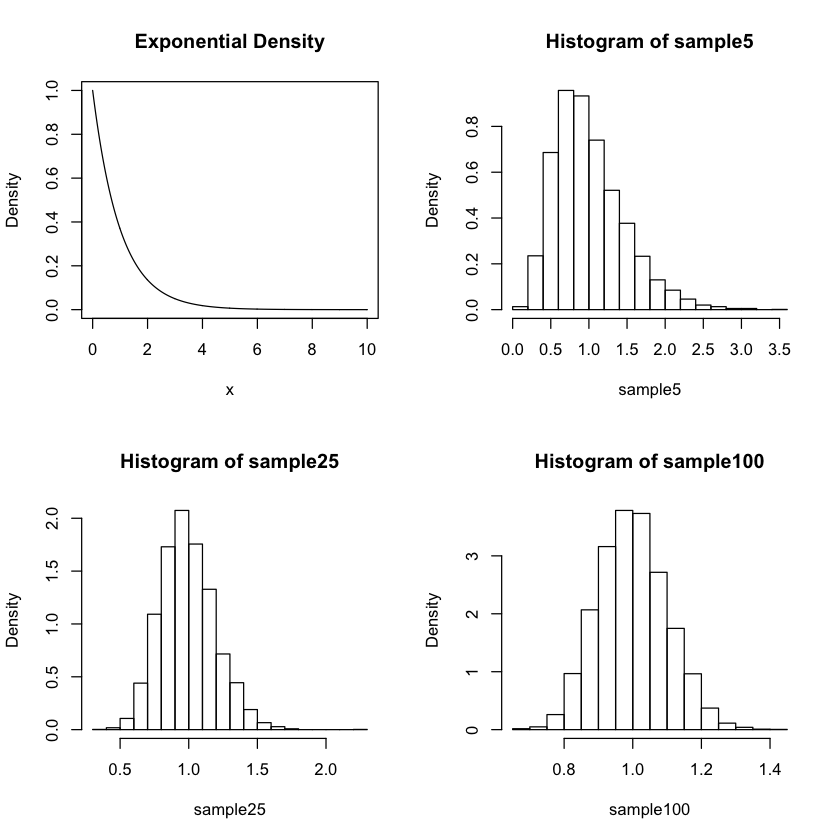

In [1]:
set.seed(613)
# Sample from an extremely skewed population, e.g. exponential distribution.
x <- seq(from = 0, to = 10, by = 0.01)
y <- dexp(x = x, rate = 1)
par(mfrow=c(2,2))
plot(y = y, x = x, type = "l", main = "Exponential Density", ylab = "Density")

# Draw 5000 samples of size 5, 25 & 100, and plot the distribution of the sample mean.
sample5 <- sample25 <- sample100 <- rep(NA, 5000)
for (i in 1:5000){
    sample5[i] <- mean(rexp(n = 5, rate = 1))
    sample25[i] <- mean(rexp(n = 25, rate = 1))
    sample100[i] <- mean(rexp(n = 100, rate = 1))
}
hist(sample5, freq = F)
# curve(dexp, from = 0, to = 5, add = T)
hist(sample25, freq = F)
# curve(dexp, from = 0, to = 5, add = T)
hist(sample100, freq = F)
# curve(dexp, from = 0, to = 5, add = T)

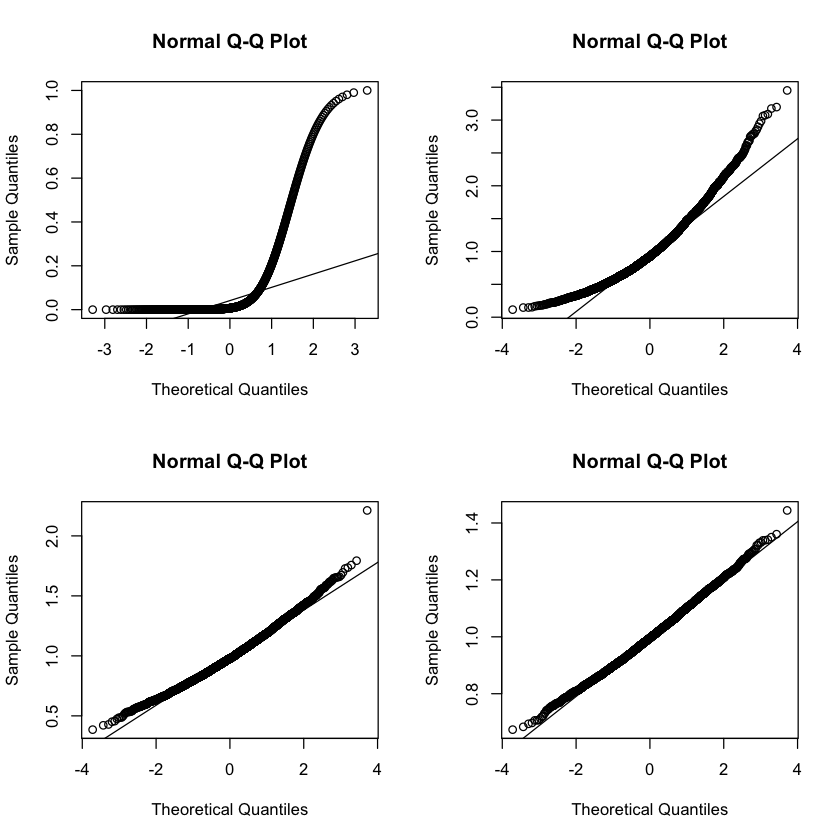

In [2]:
# Recall a visual check of normality - Normal Q-Q plot
par(mfrow = c(2,2))
qqnorm(y)
qqline(y)
qqnorm(sample5)
qqline(sample5)
qqnorm(sample25)
qqline(sample25)
qqnorm(sample100)
qqline(sample100)

## 9.1 Tests of means
- z-score
$$ z=\frac{\bar{X}-\mu}{\sqrt{\sigma^2/n}} $$
    where $\sigma^2$ is the known standard deviation of the distribution from which the samples are drawn.
- Student's t-test
$$ t = \frac{\bar{X}-\mu}{\sqrt{S^2/n}} $$
    where $S^2$ is the sample variance.

### 9.1.1 Test whether the sample is drawn from a normal distribution $Normal(\mu_0=1, 4)$, with $\sigma^2=4$ known.
$$ z=\frac{\bar{X}-\mu_0}{\sqrt{\sigma^2/n}} $$

In [3]:
n <- 20
x <- rnorm(n, mean = 2, sd = 2) # Sample is actually drawn from N(2,4)
z <- (mean(x) - 1) / sqrt(4/n); z
p.val <- 2 * pnorm(q = z, mean = 0, sd = 1, lower.tail = F); p.val
# Rejected at alpha=0.05.

[1] 2.960301

[1] 0.003073383

### 9.1.2 Test whether the sample is drawn from a normal distribution $Normal(\mu_0=1, \sigma^2)$, with $\sigma^2$ unknown.
$$ t = \frac{\bar{X}-\mu_0}{\sqrt{S^2/n}} $$

#### R function: t.test( )

In [4]:
t.test(x = x, mu = 1)


	One Sample t-test

data:  x
t = 2.3766, df = 19, p-value = 0.02814
alternative hypothesis: true mean is not equal to 1
95 percent confidence interval:
 1.157943 3.489831
sample estimates:
mean of x 
 2.323887 


In [5]:
# Reproduce the result
s.squared <- var(x)
t <- (mean(x) - 1) / sqrt(s.squared/n); t
p.val <- 2 * pt(q = t, df = n-1, lower.tail = F); p.val 
# Rejected at alpha=0.05.

[1] 2.376553

[1] 0.02814237

### 9.1.3 Note that by the central limit theorem, the sample mean is normally distributed, therefore we can test whether any large enough sample has mean $\mu_0$ (unknown distribution and unknown variance).
Let's draw a sample of size 50 from a poisson distribution $Poisson(3)$, with $\mu=3$, $\sigma^2=3$.

In [6]:
n <- 50
y <- rpois(n = n, lambda = 3)

# If sigma^2=3 is known, we use z-score.
z <- (mean(y)-3)/sqrt(3/50)
p.val <- 2 * pnorm(q = z, mean = 0, sd = 1); p.val
# Rejected at alpha=0.05.

[1] 0.4624327

In [7]:
t.test(x = y, mu = 3)   # mu = 3 is the null hypothesis.


	One Sample t-test

data:  y
t = -0.68057, df = 49, p-value = 0.4993
alternative hypothesis: true mean is not equal to 3
95 percent confidence interval:
 2.288502 3.351498
sample estimates:
mean of x 
     2.82 


In [8]:
# Reproduce the result
(mean(y)-3)/sqrt(var(y)/n)

[1] -0.6805742

### 9.1.4 Test whether two samples drawn from distributions with unknown variances have the same mean.
Note that the sample size can even be different, but the degree of freedom can be weird.

In [9]:
y1 <- rexp(n = n, rate = 1)       # mean = 1
y2 <- rexp(n = 2 * n, rate = 2)   # mean = 0.5
t.test(y1, y2, mu = 0.5, alternative = "greater")
# Default is "two-sided".


	Welch Two Sample t-test

data:  y1 and y2
t = -1.4528, df = 66.779, p-value = 0.9245
alternative hypothesis: true difference in means is greater than 0.5
95 percent confidence interval:
 0.06482903        Inf
sample estimates:
mean of x mean of y 
0.8474363 0.5500199 


### 9.1.5 Paired t-test
Sometimes it makes more sense to compare only within pairs. Let's see a fake data of 50 patients' BMI before and after a treatment.

In [10]:
# No need to worry about the data generation process.
bmi.before <- rnorm(n = 50, mean = 30, sd = 8)
bmi.after <- bmi.before - rnorm(n = 50, mean = 3, sd = 2)
Patient.ID <- 1:50
d <- data.frame(Patient.ID, bmi.before, bmi.after)
head(d)

Patient.ID,bmi.before,bmi.after
<int>,<dbl>,<dbl>
1,28.04492,25.71409
2,21.73116,14.05343
3,38.45868,36.13489
4,27.89295,26.79344
5,35.73141,33.13076
6,40.86248,35.64227


In [11]:
cor(bmi.before, bmi.after)
# The two variables are highly correlated.
# Those with high BMI before treatment are still relatively high after the treatment.
# We should only compare within pairs.

[1] 0.9792187

In [12]:
var(bmi.before)
var(bmi.after)
# Sometimes we can assume that the two variables have the same variance
# based on topic-specific knowledge.

[1] 67.78604

[1] 73.44753

#### $H_0$: The treatment lowers the BMI of parient by at least 3.
#### $H_1$ The treatment lowers the BMI of parient by at most 3.

In [13]:
t.test(x = bmi.before, y = bmi.after, mu = 3,
       alternative = "greater", paired = T, var.equal = T)
# var.equal = TRUE assumes equal variance.


	Paired t-test

data:  bmi.before and bmi.after
t = 1.9192, df = 49, p-value = 0.0304
alternative hypothesis: true difference in means is greater than 3
95 percent confidence interval:
 3.059895      Inf
sample estimates:
mean of the differences 
               3.473713 


### 9.1.6 Pairwise t-test.

In [14]:
data(airquality)
airquality$Month <- factor(airquality$Month, labels = month.abb[5:9])
aggregate(Wind~Month, data = airquality, FUN = mean)

Month,Wind
<fct>,<dbl>
May,11.622581
Jun,10.266667
Jul,8.941935
Aug,8.793548
Sep,10.180000


In [15]:
pairwise.t.test(airquality$Wind, airquality$Month)


	Pairwise comparisons using t tests with pooled SD 

data:  airquality$Wind and airquality$Month 

    May   Jun   Jul   Aug  
Jun 0.751 -     -     -    
Jul 0.021 0.751 -     -    
Aug 0.014 0.751 1.000 -    
Sep 0.751 1.000 0.751 0.751

P value adjustment method: holm 

##### For each month-pair, a t-test is performed. However this may lead to multiple testing.
##### The solution is adjusted p value.
## 9.2 Tests of variances
- The F-test
    - Compare the variances of two samples from normal populations.
- Analysis of variance (ANOVA)
    - will be covered in next lecture along with linear regression.

In [16]:
x1 <- rnorm(100, mean = 1, sd = 5)
x2 <- rnorm(50, mean = 5, sd = 8)
var.test(x1, x2)


	F test to compare two variances

data:  x1 and x2
F = 0.48122, num df = 99, denom df = 49, p-value = 0.002128
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.2892292 0.7686950
sample estimates:
ratio of variances 
         0.4812208 


In [17]:
# Reproduce the result
f <- var(x1)/var(x2); f
2 * pf(q = f, df1 = 99, df2 = 49)

[1] 0.4812208

[1] 0.002127611

## 9.3 Tests of proportions
- prop.test( ), uses Pearson's chi-squared test
- binom.test( ), uses exact binomial probabilities
- chisq.test( ), Pearson's chi-squared test itself

### 9.3.1 Test whether a coin is a fair coin if there are 7 heads in 10 tosses .
#### prop.test( )

In [18]:
prop.test(x = 7, n = 10, p = 0.5, correct = F)


	1-sample proportions test without continuity correction

data:  7 out of 10, null probability 0.5
X-squared = 1.6, df = 1, p-value = 0.2059
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.3967781 0.8922087
sample estimates:
  p 
0.7 


The $\chi^2$ statistic is calculated as, $O$ stands for observed and $E$ stands for expected.

This can be viewed as deviations of the observed data from the expected data under null probabilities.
$$ \chi^2 = \sum_{i}\frac{(O_i-E_i)^2}{E_i} $$

In our case, $O_1=7, E_1=5, O_2=3, E_2=5$

In [19]:
# Reproduce the result
observed <- c(7,3)
expected <- c(5,5)
X2 <- sum((observed-expected)^2/expected); X2
pchisq(q = X2, df = 2-1, lower.tail = F)

[1] 1.6

[1] 0.2059032

In [20]:
# Reproduce the result
chisq.test(c(7,3), correct = F)


	Chi-squared test for given probabilities

data:  c(7, 3)
X-squared = 1.6, df = 1, p-value = 0.2059


With Yate's correction for continuity
$$ \chi^2 = \sum_{i}\frac{(|O_i-E_i|-0.5)^2}{E_i} $$

In [21]:
prop.test(x = 7, n = 10, p = 0.5, correct = T)


	1-sample proportions test with continuity correction

data:  7 out of 10, null probability 0.5
X-squared = 0.9, df = 1, p-value = 0.3428
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.3536707 0.9190522
sample estimates:
  p 
0.7 


In [22]:
# Reproduce the result
X2 <- sum((abs(observed-expected)-0.5)^2/expected); X2

[1] 0.9

#### binom.test( )

In [23]:
binom.test(7, 10)


	Exact binomial test

data:  7 and 10
number of successes = 7, number of trials = 10, p-value = 0.3438
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.3475471 0.9332605
sample estimates:
probability of success 
                   0.7 


In [24]:
# Reproduce the result
2 * pbinom(q = 6, size = 10, prob = 0.5, lower.tail = F)

[1] 0.34375

### 9.3.2 Test whether treated and untreated have the same mortality

In [25]:
dead <- c(5, 8)
alive <- c(15, 12)
total <- c(20, 20)
prop.test(dead, total, correct = F)


	2-sample test for equality of proportions without continuity
	correction

data:  dead out of total
X-squared = 1.0256, df = 1, p-value = 0.3112
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.4365505  0.1365505
sample estimates:
prop 1 prop 2 
  0.25   0.40 


In [26]:
data.frame(dead, alive, total)

dead,alive,total
<dbl>,<dbl>,<dbl>
5,15,20
8,12,20


If we assume equal probability, the expected table should be

In [27]:
exp.dead <- rep(mean(dead), 2)
exp.alive <- rep(mean(alive), 2)
data.frame(exp.dead, exp.alive, total)

exp.dead,exp.alive,total
<dbl>,<dbl>,<dbl>
6.5,13.5,20
6.5,13.5,20


In [28]:
# Reproduce the result
# With the same formula
obs <- c(5, 8, 12, 15)
exp <- c(6.5, 6.5, 13.5, 13.5)
sum((obs-exp)^2/exp)

[1] 1.025641

$$ \frac{(5-6.5)^2}{6.5}+\frac{(8-6.5)^2}{6.5} +\frac{(15-13.5)^2}{13.5}+\frac{(12-13.5)^2}{13.5} = 1.0256 $$

In [29]:
chisq.test(data.frame(dead, alive), correct = F)


	Pearson's Chi-squared test

data:  data.frame(dead, alive)
X-squared = 1.0256, df = 1, p-value = 0.3112


## 9.4 Tests of correlations

In [30]:
cor(bmi.before, bmi.after)

[1] 0.9792187

In [31]:
cor.test(bmi.before, bmi.after)


	Pearson's product-moment correlation

data:  bmi.before and bmi.after
t = 33.452, df = 48, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9634803 0.9882152
sample estimates:
      cor 
0.9792187 


In [32]:
# Reproduce the result
r <- cor(bmi.before, bmi.after)
se.r <- sqrt((1-r^2)/(50-2))
r/se.r

[1] 33.4516

$$ \frac{\rho}{\sqrt{\frac{1-\rho^2}{n-2}}} \sim t_{n-2} $$
    where $\rho$ is the correlation coefficient.